In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import healpy as hp
from healpy.newvisufunc import projview, newprojplot


In [2]:
df = pd.read_csv('../log_dir/Dipole_and_Quadrupole_Data/Fixed_dipole/bayes_factors.csv')
df

,Comparison,index,bayes_factor
0,B_32,0,12.769347
1,B_31,0,9.101738
2,B_30,0,21.637780
3,B_32,1,15.836638
4,B_31,1,6.723988
...,...,...,...
1999,B_31,666,16.117164
2000,B_30,666,27.671061
2001,B_32,667,9.319843
2002,B_31,667,3.616680


In [3]:
dipole_comparison_df = df[df['Comparison'] == 'B_31']
dipole_comparison_df

,Comparison,index,bayes_factor
1,B_31,0,9.101738
4,B_31,1,6.723988
7,B_31,2,6.352722
10,B_31,3,-0.577910
13,B_31,4,10.830577
...,...,...,...
1990,B_31,663,0.580353
1993,B_31,664,6.642093
1996,B_31,665,7.335109
1999,B_31,666,16.117164


In [4]:
def compute_metrics(v1, v2, v3):
    dp12 = np.dot(v1, v2)
    dp13 = np.dot(v1, v3)
    dp23 = np.dot(v2, v3)

    raw_alignment = (dp12 + dp13 + dp23) / 3
    determinant = np.linalg.det(np.vstack([v1, v2, v3]))
    return raw_alignment, determinant

pathname = "../log_dir/Dipole_and_Quadrupole_Data/Fixed_dipole/"
alignment_dataframe = pd.DataFrame(columns=['index', 'raw_alignment', 'determinant'])
N_bar = 40
for i in range(668):
    file_path = pathname + f"dipole_quadrupole_model/dipole_quadrupole_Nbar_40_{i}/chains/equal_weighted_post.txt"

    df=pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, names=['Nbar', 'D','Q', 'l', 'b', 'l1', 'b1', 'l2', 'b2'])
    
    # First load the data and metadata
    data = np.load(pathname+f'Datasets/Raw_Files/Nbar_{N_bar}/skymap_data_Nbar_{N_bar}_{i}.npy',
                    allow_pickle=True).item()
    m = data['m']
    metadata = data['metadata']
    NSIDE = metadata['NSIDE']
    NPIX = metadata['NPIX']
    dipole_vector = metadata['dipole_vector']
    q_vector_1 = metadata['quad_vector_1']
    q_vector_2 = metadata['quad_vector_2']

    raw_alignment, determinant = compute_metrics(
        hp.ang2vec(dipole_vector[0], dipole_vector[1]),
        hp.ang2vec(q_vector_1[0], q_vector_1[1]),
        hp.ang2vec(q_vector_2[0], q_vector_2[1]))

    new_row = pd.DataFrame([{
        'index': i,
        'raw_alignment': raw_alignment,
        'determinant': determinant
    }])
    alignment_dataframe = pd.concat([alignment_dataframe, new_row], ignore_index=True)

In [5]:
alignment_dataframe

,index,raw_alignment,determinant
0,0,-0.230506,-0.831345
1,1,-0.250949,-0.294492
2,2,-0.010628,0.151632
3,3,-0.461547,-0.370326
4,4,0.264487,0.380903
...,...,...,...
663,663,0.101406,-0.000612
664,664,-0.084155,0.871161
665,665,0.124493,-0.171691
666,666,-0.043014,0.950456


In [6]:
dipole_comparison_merged = pd.merge(dipole_comparison_df, alignment_dataframe, on='index', how='left')
dipole_comparison_merged

,Comparison,index,bayes_factor,raw_alignment,determinant
0,B_31,0,9.101738,-0.230506,-0.831345
1,B_31,1,6.723988,-0.250949,-0.294492
2,B_31,2,6.352722,-0.010628,0.151632
3,B_31,3,-0.577910,-0.461547,-0.370326
4,B_31,4,10.830577,0.264487,0.380903
...,...,...,...,...,...
663,B_31,663,0.580353,0.101406,-0.000612
664,B_31,664,6.642093,-0.084155,0.871161
665,B_31,665,7.335109,0.124493,-0.171691
666,B_31,666,16.117164,-0.043014,0.950456


In [7]:
filtered_df = dipole_comparison_merged[dipole_comparison_merged['bayes_factor'] < 3]
filtered_df

,Comparison,index,bayes_factor,raw_alignment,determinant
3,B_31,3,-0.577910,-0.461547,-0.370326
7,B_31,7,1.414253,-0.366217,0.182922
8,B_31,8,2.607287,-0.156818,-0.220686
12,B_31,12,0.862226,-0.245037,0.102268
15,B_31,15,-0.275887,-0.317282,-0.265666
...,...,...,...,...,...
613,B_31,613,-0.977678,-0.298044,-0.494947
638,B_31,638,-1.012359,0.446624,0.365807
639,B_31,639,0.648158,0.162133,0.629901
655,B_31,655,0.872480,-0.242998,-0.218490


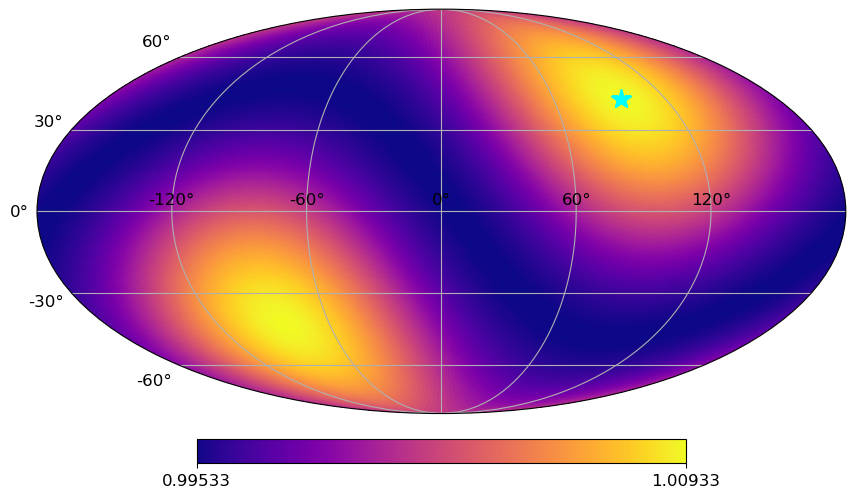

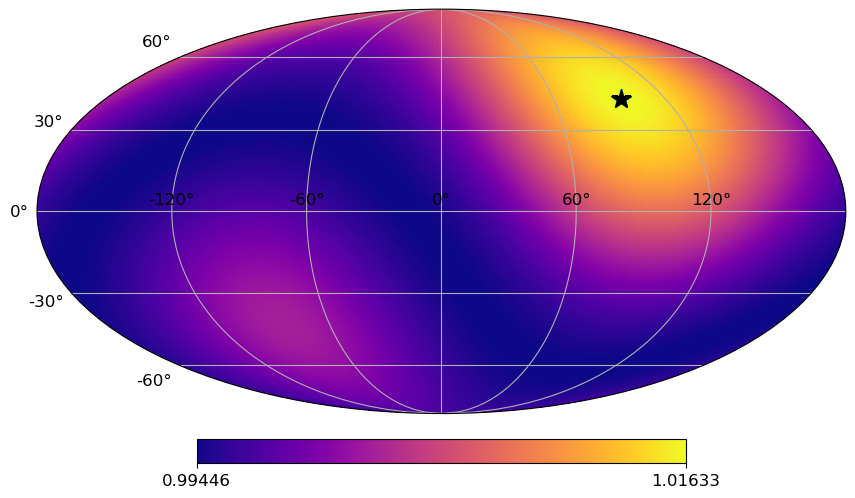

In [ ]:
%matplotlib inline
theta1, phi1 = 80, 150
theta2, phi2 = 130, -50

dipole_theta = np.deg2rad(48)
dipole_phi = -np.deg2rad(360-264)

theta1, phi1 = np.deg2rad(theta1), np.deg2rad(phi1)
theta2, phi2 = np.deg2rad(theta2), np.deg2rad(phi2)

theta1, phi1 = dipole_theta, dipole_phi
theta2, phi2 = dipole_theta, dipole_phi

NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
pixels = hp.pix2vec(NSIDE, np.arange(NPIX))

# Quadrupole signal
a = hp.ang2vec(theta1, phi1)
b = hp.ang2vec(theta2, phi2)

Q_prime = np.outer(a, b)
Q_star = 1/2 * (Q_prime + Q_prime.T)
Q_hat = Q_star - (np.trace(Q_star)/3 * np.eye(3))

Q = 0.014

f = Q*np.einsum('ij,i...,j...', Q_hat, pixels, pixels)

# Dipole signal
D = 0.007 
x,y,z = hp.pix2vec(NSIDE, np.arange(NPIX)) # pixel vectors

#  dipole vector
dipole_theta = np.deg2rad(48)
dipole_phi = -np.deg2rad(360-264)
x_dip, y_dip, z_dip = hp.ang2vec(dipole_theta, dipole_phi) 

# Angle calculation
# theta = pixel_angles(x,y,z,x_dip,y_dip,z_dip)
pixels = np.array([x, y, z])
dipole_vec = np.array([x_dip,y_dip,z_dip])
dot_product = np.dot(dipole_vec, pixels)
angles = np.arccos(dot_product)
# 'Raw signal'
m = 1 + D*np.cos(angles) + f

# 'Raw Signal'
m_q = 1 + f
hp.projview(m_q, cmap='plasma', graticule=True)
newprojplot(theta1, phi1, marker="*", color="cyan", markersize=15)
newprojplot(theta2, phi2, marker="*", color="cyan", markersize=15)
plt.tight_layout()

plt.show()
plt.close()

hp.projview(m, cmap='plasma', graticule=True)
newprojplot(theta1, phi1, marker="*", color="cyan", markersize=15)
newprojplot(theta2, phi2, marker="*", color="cyan", markersize=15)
newprojplot(dipole_theta, dipole_phi, marker="*", color="k", markersize=15)
plt.tight_layout()

In [26]:
import numpy as np
import healpy as hp

def quadrupole_signal_with_gradient(NSIDE, N_bar, Q, vector_1, vector_2):
    NPIX = hp.nside2npix(NSIDE)
    pixels = np.vstack(hp.pix2vec(NSIDE, np.arange(NPIX)))  # (3, NPIX)

    # Convert (theta, phi) → unit vectors
    a = hp.ang2vec(vector_1[0], vector_1[1])
    b = hp.ang2vec(vector_2[0], vector_2[1])

    # Quadrupole tensor (symmetric, traceless)
    Q_prime = np.outer(a, b)
    Q_star = 0.5 * (Q_prime + Q_prime.T)
    Q_hat = Q_star - (np.trace(Q_star) / 3.0) * np.eye(3)

    # Quadrupole term (no constant 1 yet)
    quad_term = np.einsum('ij,i...,j...', Q_hat, pixels, pixels)

    # Raw quadrupole signal
    quad_signal = 1 + Q * quad_term

    # ---- Gradient on sphere ----
    grad_cart = 2 * Q * (Q_hat @ pixels)                           # 2Q Q_hat·p
    grad_proj = grad_cart - (2 * Q * quad_term) * pixels           # subtract radial part
    grad_mag = np.linalg.norm(grad_proj, axis=0)

    return quad_signal, grad_mag


def dipole_quadrupole_signal_with_gradient(NSIDE, N_bar, D, Q, d_vector, vector_1, vector_2):

    NPIX = hp.nside2npix(NSIDE)

    # Dipole signal
    dipole_theta = d_vector[0]
    dipole_phi = d_vector[1]
    x_dip, y_dip, z_dip = hp.ang2vec(dipole_theta, dipole_phi)

    # Angle calculation
    pixels = np.array([x, y, z])
    dipole_vec = np.array([x_dip,y_dip,z_dip])
    dot_product = np.dot(dipole_vec, pixels)
    angles = np.arccos(dot_product)
    # 'Raw signal'
    dipole_signal = D*np.cos(angles)

    # Quadrupole signal
    pixels = np.vstack(hp.pix2vec(NSIDE, np.arange(NPIX)))  # (3, NPIX)
    # Convert (theta, phi) → unit vectors
    a = hp.ang2vec(vector_1[0], vector_1[1])
    b = hp.ang2vec(vector_2[0], vector_2[1])

    # Quadrupole tensor (symmetric, traceless)
    Q_prime = np.outer(a, b)
    Q_star = 0.5 * (Q_prime + Q_prime.T)
    Q_hat = Q_star - (np.trace(Q_star) / 3.0) * np.eye(3)

    # Quadrupole term (no constant 1 yet)
    quad_term = np.einsum('ij,i...,j...', Q_hat, pixels, pixels)

    # Raw quadrupole signal
    quad_signal = Q * quad_term

    total_signal = 1 + dipole_signal + quad_signal


    # ---- Gradient on sphere ----
    grad_cart = 2 * Q * (Q_hat @ pixels)                           # 2Q Q_hat·p
    grad_proj = grad_cart - (2 * Q * quad_term) * pixels           # subtract radial part
    grad_mag = np.linalg.norm(grad_proj, axis=0)

    return total_signal, grad_mag

def dipole_quadrupole_signal_with_gradient(NSIDE, N_bar, D, Q, d_vector, vector_1, vector_2):
    NPIX = hp.nside2npix(NSIDE)
    pixels = np.vstack(hp.pix2vec(NSIDE, np.arange(NPIX)))  # (3, NPIX)

    # ---- Dipole unit vector ----
    dipole_vec = np.array(hp.ang2vec(d_vector[0], d_vector[1]))  # (3,)

    # ---- Dipole term ----
    dipole_term = np.dot(dipole_vec, pixels)   # cos(theta)
    dipole_signal = D * dipole_term

    # ---- Quadrupole tensor ----
    a = hp.ang2vec(vector_1[0], vector_1[1])
    b = hp.ang2vec(vector_2[0], vector_2[1])
    Q_prime = np.outer(a, b)
    Q_star = 0.5 * (Q_prime + Q_prime.T)
    Q_hat = Q_star - (np.trace(Q_star) / 3.0) * np.eye(3)

    # ---- Quadrupole term ----
    quad_term = np.einsum('ij,i...,j...', Q_hat, pixels, pixels)
    quad_signal = Q * quad_term

    # ---- Total signal ----
    total_signal = 1 + dipole_signal + quad_signal

    # ---- Dipole gradient ----
    grad_dip_cart = D * dipole_vec[:, None]
    grad_dip_proj = grad_dip_cart - (D * dipole_term) * pixels

    # ---- Quadrupole gradient ----
    grad_quad_cart = 2 * Q * (Q_hat @ pixels)
    grad_quad_proj = grad_quad_cart - (2 * Q * quad_term) * pixels

    # ---- Total gradient ----
    grad_proj = grad_dip_proj + grad_quad_proj
    grad_mag = np.linalg.norm(grad_proj, axis=0)

    return total_signal, grad_mag

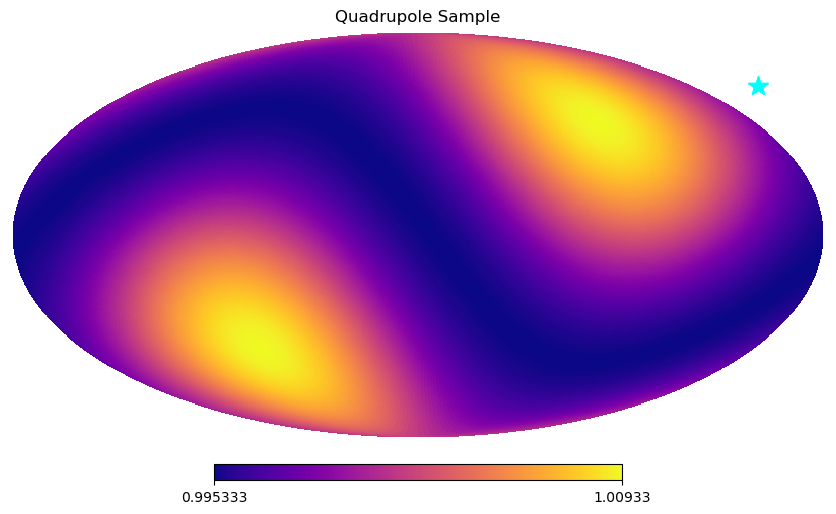

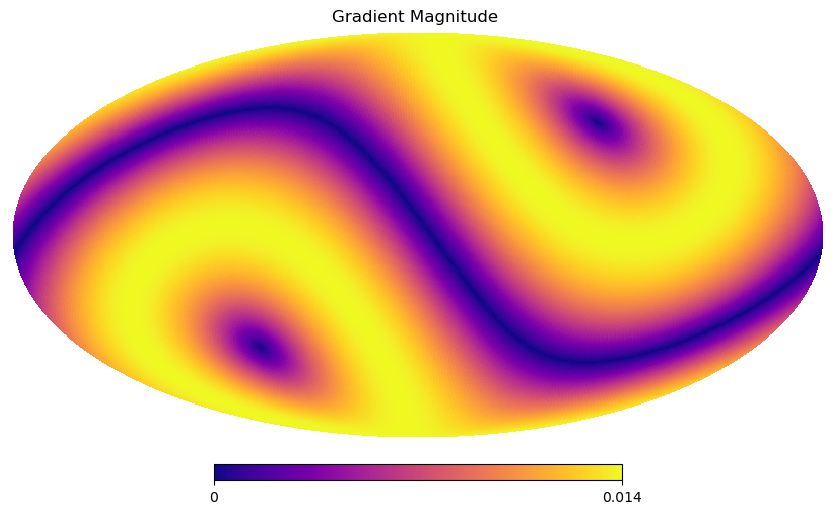

In [ ]:
NSIDE = 64
N_bar = 1
Q = 0.014
q_vector_1 = [theta1, phi1]
q_vector_2 = [theta2, phi2]

sample, grad_mag = quadrupole_signal_with_gradient(NSIDE, N_bar, Q, q_vector_1, q_vector_2)

hp.mollview(sample, title='Quadrupole Sample', cmap='plasma')
# hp.graticule()
newprojplot(theta1, phi1, marker="*", color="cyan", markersize=15)
newprojplot(theta2, phi2, marker="*", color="cyan", markersize=15)

plt.show()
plt.close()

hp.mollview(grad_mag, title='Gradient Magnitude ', cmap='plasma', min=0)

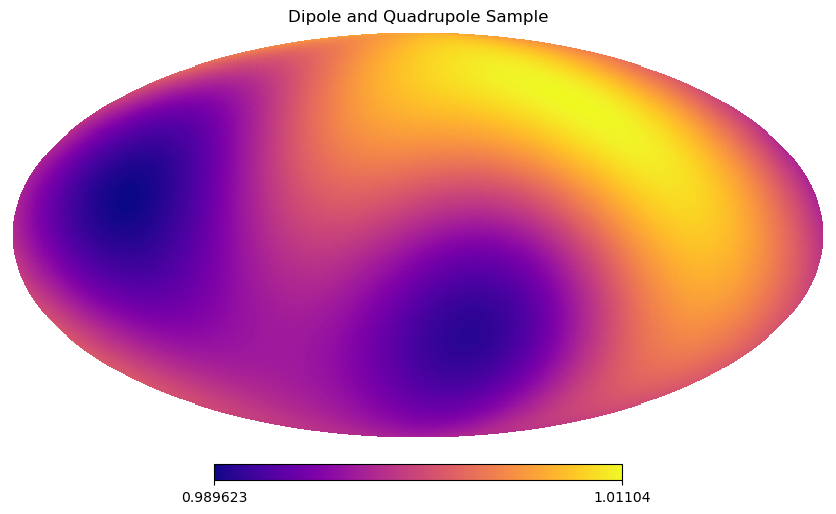

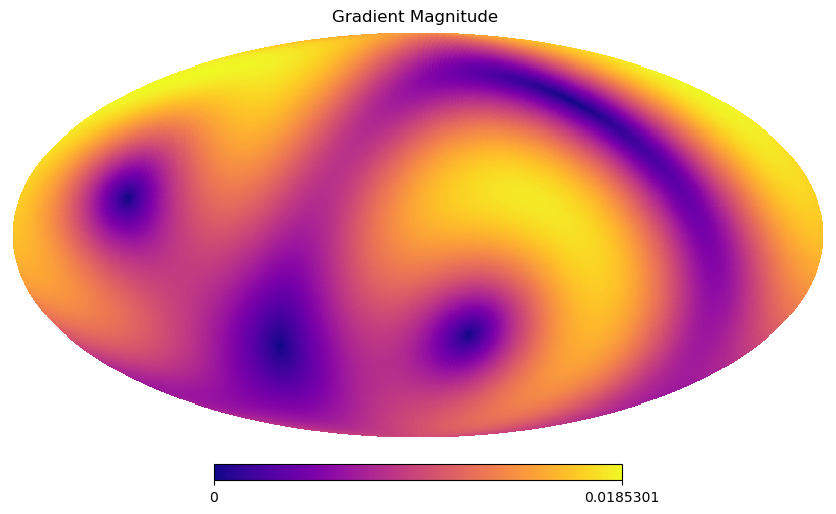

In [33]:
NSIDE = 64
N_bar = 1
D = 0.007
Q = 0.014
dipole_theta = np.deg2rad(48)
dipole_phi = -np.deg2rad(360-264)
theta1, phi1 = np.deg2rad(80), np.deg2rad(150)
theta2, phi2 = np.deg2rad(130), np.deg2rad(-50)

dipole_vector = [dipole_theta, dipole_phi]
q_vector_1 = [theta1, phi1]
q_vector_2 = [theta2, phi2]


sample, grad_mag = dipole_quadrupole_signal_with_gradient(NSIDE, N_bar, D, Q, dipole_vector, q_vector_1, q_vector_2)

hp.mollview(sample, title='Dipole and Quadrupole Sample', cmap='plasma')

hp.mollview(grad_mag, title='Gradient Magnitude ', cmap='plasma', min=0)

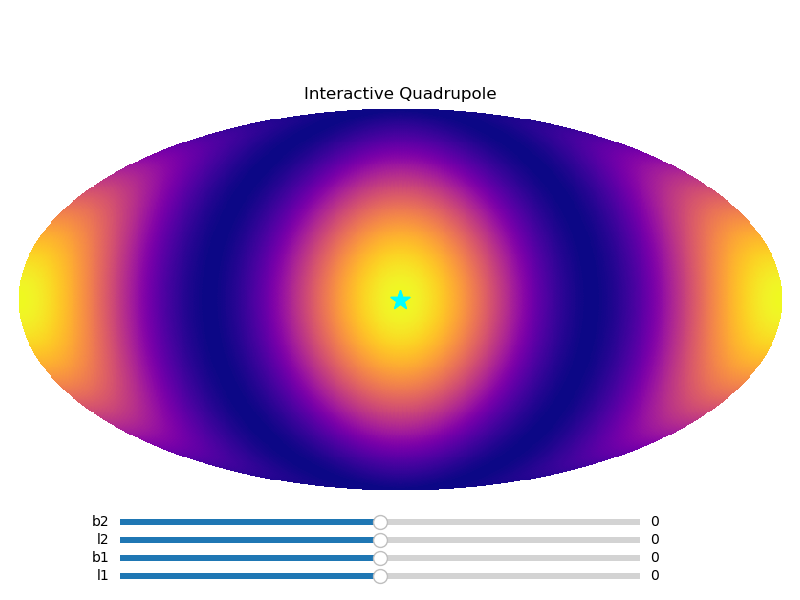

In [16]:
# Interactive figure, quadrupole
from matplotlib.widgets import Slider
%matplotlib widget
NSIDE = 128
NPIX = hp.nside2npix(NSIDE)
Q = 0.014

def update(val):
    
    l1 = s_l1.val
    b1 = s_b1.val
    l2 = s_l2.val
    b2 = s_b2.val

    theta1, phi1 = np.deg2rad(90 - b1), np.deg2rad(l1)
    theta2, phi2 = np.deg2rad(90 - b2), np.deg2rad(l2)

    a = hp.ang2vec(theta1, phi1)
    b = hp.ang2vec(theta2, phi2)

    Q_prime = np.outer(a, b)
    Q_star = 0.5 * (Q_prime + Q_prime.T)
    Q_hat = Q_star - (np.trace(Q_star)/3) * np.eye(3)

    pixels = hp.pix2vec(NSIDE, np.arange(NPIX))
    f = Q * np.einsum('ij,i...,j...', Q_hat, pixels, pixels)
    m_q = 1 + f

    hp.mollview(m_q, fig=fig.number, cmap='plasma', title="Interactive Quadrupole", hold=False, cbar=False)
    hp.projscatter(theta1, phi1, lonlat=False, marker='*', s=200, color='cyan')
    hp.projscatter(theta2, phi2, lonlat=False, marker='*', s=200, color='cyan')
    
l1_init, b1_init = 0, 0
l2_init, b2_init = 0, 0

# Figures
fig = plt.figure(figsize=(8, 6))
axcolor = 'lightgoldenrodyellow'
ax_l1 = plt.axes([0.15, 0.03, 0.65, 0.02], facecolor=axcolor)
ax_b1 = plt.axes([0.15, 0.06, 0.65, 0.02], facecolor=axcolor)
ax_l2 = plt.axes([0.15, 0.09, 0.65, 0.02], facecolor=axcolor)
ax_b2 = plt.axes([0.15, 0.12, 0.65, 0.02], facecolor=axcolor)

# Sliders
s_l1 = Slider(ax_l1, 'l1', -180, 180, valinit=l1_init)
s_b1 = Slider(ax_b1, 'b1', -90, 90, valinit=b1_init)
s_l2 = Slider(ax_l2, 'l2', -180, 180, valinit=l2_init)
s_b2 = Slider(ax_b2, 'b2', -90, 90, valinit=b2_init)

# Updates
s_l1.on_changed(update)
s_b1.on_changed(update)
s_l2.on_changed(update)
s_b2.on_changed(update)

update(None)
plt.show()

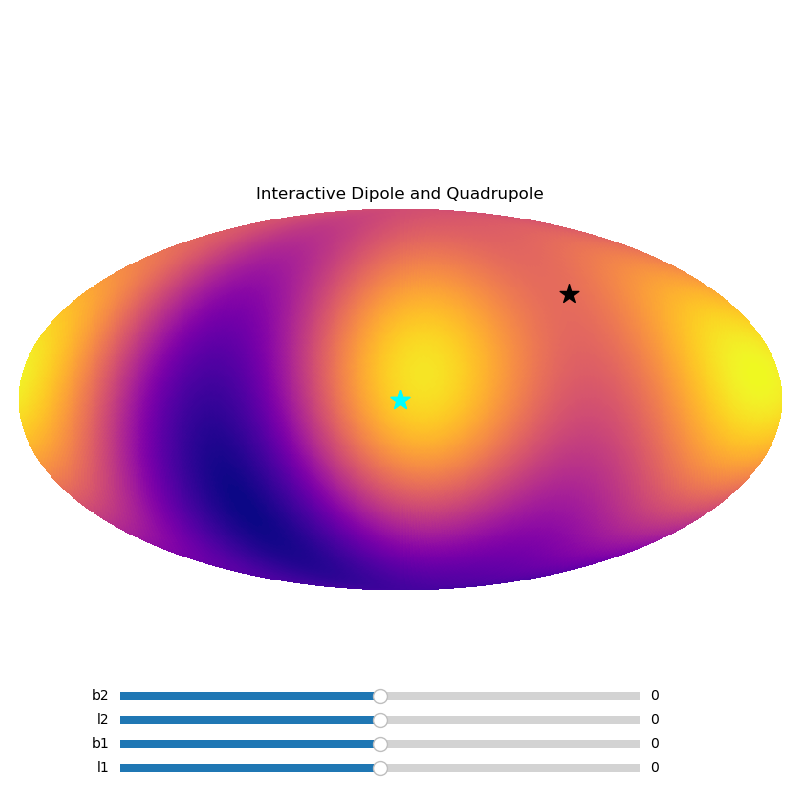

In [19]:
# Interactive figure, dipole with quadrupole
%matplotlib widget
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
Q = 0.014
D = 0.007 
x,y,z = hp.pix2vec(NSIDE, np.arange(NPIX))
dipole_theta = np.deg2rad(48)
dipole_phi = -np.deg2rad(360-264)

x_dip, y_dip, z_dip = hp.ang2vec(dipole_theta, dipole_phi)
pixels = np.array([x, y, z])
dipole_vec = np.array([x_dip,y_dip,z_dip])
dot_product = np.dot(dipole_vec, pixels)
angles = np.arccos(dot_product)
m_d = D*np.cos(angles)

def update(val):
    l1 = s_l1.val
    b1 = s_b1.val
    l2 = s_l2.val
    b2 = s_b2.val

    theta1, phi1 = np.deg2rad(90 - b1), np.deg2rad(l1)
    theta2, phi2 = np.deg2rad(90 - b2), np.deg2rad(l2)

    a = hp.ang2vec(theta1, phi1)
    b = hp.ang2vec(theta2, phi2)

    Q_prime = np.outer(a, b)
    Q_star = 0.5 * (Q_prime + Q_prime.T)
    Q_hat = Q_star - (np.trace(Q_star)/3) * np.eye(3)

    pixels = hp.pix2vec(NSIDE, np.arange(NPIX))
    f = Q * np.einsum('ij,i...,j...', Q_hat, pixels, pixels)
    m_q = 1 + m_d + f

    hp.mollview(m_q, fig=fig.number, cmap='plasma', title="Interactive Dipole and Quadrupole", hold=False, cbar=False)
    hp.projscatter(dipole_theta, dipole_phi, lonlat=False, marker='*', s=200, color='k')
    hp.projscatter(theta1, phi1, lonlat=False, marker='*', s=200, color='cyan')
    hp.projscatter(theta2, phi2, lonlat=False, marker='*', s=200, color='cyan')
    

l1_init, b1_init = 0, 0
l2_init, b2_init = 0, 0

# Figure
fig = plt.figure(figsize=(8, 8))
axcolor = 'lightgoldenrodyellow'
ax_l1 = plt.axes([0.15, 0.03, 0.65, 0.02], facecolor=axcolor)
ax_b1 = plt.axes([0.15, 0.06, 0.65, 0.02], facecolor=axcolor)
ax_l2 = plt.axes([0.15, 0.09, 0.65, 0.02], facecolor=axcolor)
ax_b2 = plt.axes([0.15, 0.12, 0.65, 0.02], facecolor=axcolor)

# Sliders
s_l1 = Slider(ax_l1, 'l1', -180, 180, valinit=l1_init)
s_b1 = Slider(ax_b1, 'b1', -90, 90, valinit=b1_init)
s_l2 = Slider(ax_l2, 'l2', -180, 180, valinit=l2_init)
s_b2 = Slider(ax_b2, 'b2', -90, 90, valinit=b2_init)

# Updates
s_l1.on_changed(update)
s_b1.on_changed(update)
s_l2.on_changed(update)
s_b2.on_changed(update)

update(None)
plt.show()

# Interactive raw signal and gradient figure 

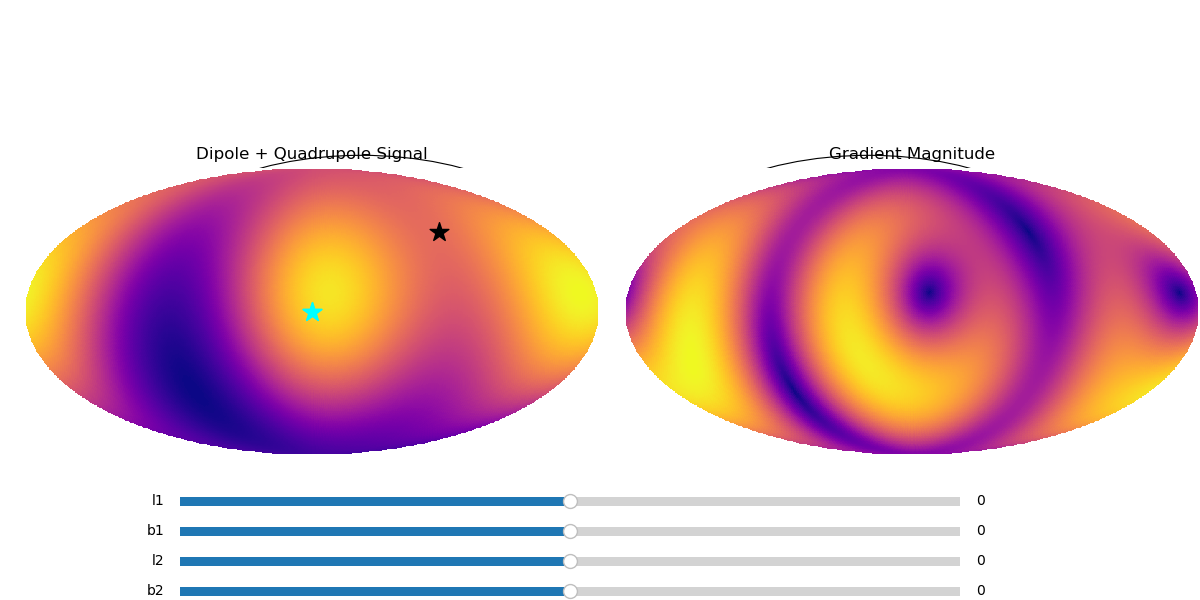

In [68]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib widget

NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
Q = 0.014
D = 0.007

def dipole_quadrupole_signal_and_gradient(NSIDE, D, Q, dipole_vec, vector_1, vector_2):
    NPIX = hp.nside2npix(NSIDE)
    pixels = np.vstack(hp.pix2vec(NSIDE, np.arange(NPIX)))  # (3, NPIX)

    # Dipole term
    dipole_term = np.dot(dipole_vec, pixels)  # shape (NPIX,)
    dipole_signal = D * dipole_term

    # Quadrupole tensor
    a = hp.ang2vec(vector_1[0], vector_1[1])
    b = hp.ang2vec(vector_2[0], vector_2[1])
    Q_prime = np.outer(a, b)
    Q_star = 0.5 * (Q_prime + Q_prime.T)
    Q_hat = Q_star - (np.trace(Q_star) / 3.0) * np.eye(3)

    # Quadrupole term
    quad_term = np.einsum('ij,i...,j...', Q_hat, pixels, pixels)
    quad_signal = Q * quad_term

    # Total signal
    total_signal = 1 + dipole_signal + quad_signal

    # Gradient calculations
    grad_dip_cart = D * dipole_vec[:, None]
    grad_dip_proj = grad_dip_cart - (D * dipole_term) * pixels

    grad_quad_cart = 2 * Q * (Q_hat @ pixels)
    grad_quad_proj = grad_quad_cart - (2 * Q * quad_term) * pixels

    grad_proj = grad_dip_proj + grad_quad_proj
    grad_mag = np.linalg.norm(grad_proj, axis=0)

    return total_signal, grad_mag

# Create a single figure with two subplots side-by-side
fig, (ax_signal, ax_grad) = plt.subplots(1, 2, figsize=(12, 6),
                                         subplot_kw=dict(projection='mollweide'))

# Turn off default axis ticks and labels for healpy style plotting
ax_signal.set_axis_off()
ax_grad.set_axis_off()

# Slider axes below the figure
fig.subplots_adjust(bottom=0.25)
axcolor = 'lightgoldenrodyellow'
ax_l1 = fig.add_axes([0.15, 0.15, 0.65, 0.03], facecolor=axcolor)
ax_b1 = fig.add_axes([0.15, 0.10, 0.65, 0.03], facecolor=axcolor)
ax_l2 = fig.add_axes([0.15, 0.05, 0.65, 0.03], facecolor=axcolor)
ax_b2 = fig.add_axes([0.15, 0.00, 0.65, 0.03], facecolor=axcolor)

s_l1 = Slider(ax_l1, 'l1', -180, 180, valinit=0)
s_b1 = Slider(ax_b1, 'b1', -90, 90, valinit=0)
s_l2 = Slider(ax_l2, 'l2', -180, 180, valinit=0)
s_b2 = Slider(ax_b2, 'b2', -90, 90, valinit=0)

dipole_theta = np.deg2rad(48)
dipole_phi = -np.deg2rad(360-264)
dipole_vec = np.array(hp.ang2vec(dipole_theta, dipole_phi))

def partial_sky_masking(m, theta, phi, r=40): 
    vec = hp.ang2vec(theta, phi)
    ipix_disc = hp.query_disc(nside=NSIDE, vec=vec, radius=np.radians(r))

    mask = np.zeros(NPIX, dtype=bool)
    mask[ipix_disc] = True  # Set the disc pixels to True

    # For plotting, we need the array to be of length NPIX
    m_plot = hp.ma(m.copy().astype(float))
    m_plot.mask = ~mask

    return m_plot


def update(val):
    l1 = s_l1.val
    b1 = s_b1.val
    l2 = s_l2.val
    b2 = s_b2.val

    theta1, phi1 = np.deg2rad(90 - b1), np.deg2rad(l1)
    theta2, phi2 = np.deg2rad(90 - b2), np.deg2rad(l2)

    m_signal, grad_mag = dipole_quadrupole_signal_and_gradient(
        NSIDE, D, Q, dipole_vec,
        (theta1, phi1), (theta2, phi2)
    )

    # Clear axes for redraw
    ax_signal.cla()
    ax_grad.cla()

    # mask the signal
    # mask_theta = dipole_theta
    # mask_phi = dipole_phi
    # m_signal = partial_sky_masking(m_signal, mask_theta, mask_phi, r=40)

    # Plot signal map on left
    hp.mollview(m_signal, fig=fig.number, cmap='plasma', title='Dipole + Quadrupole Signal',
                hold=False, sub=(1, 2, 1), cbar=False, coord=None)

    ax_signal.grid(False)
    ax_signal.set_xticklabels([])
    ax_signal.set_yticklabels([])

    # Overlay stars on signal map
    hp.projscatter(dipole_theta, dipole_phi, lonlat=False, marker='*', s=200, color='k')
    hp.projscatter(theta1, phi1, lonlat=False, marker='*', s=200, color='cyan')
    hp.projscatter(theta2, phi2, lonlat=False, marker='*', s=200, color='cyan')

    # Apply partial sky masking to gradient magnitude
    # grad_mag = partial_sky_masking(grad_mag, mask_theta, mask_phi, r=40)
    
    # Plot gradient magnitude on right
    hp.mollview(grad_mag, fig=fig.number, cmap='plasma', title='Gradient Magnitude',
                hold=False, sub=(1, 2, 2), cbar=False, coord=None)
    ax_grad.grid(False)
    ax_grad.set_xticklabels([])
    ax_grad.set_yticklabels([])

s_l1.on_changed(update)
s_b1.on_changed(update)
s_l2.on_changed(update)
s_b2.on_changed(update)

update(None)
plt.show()

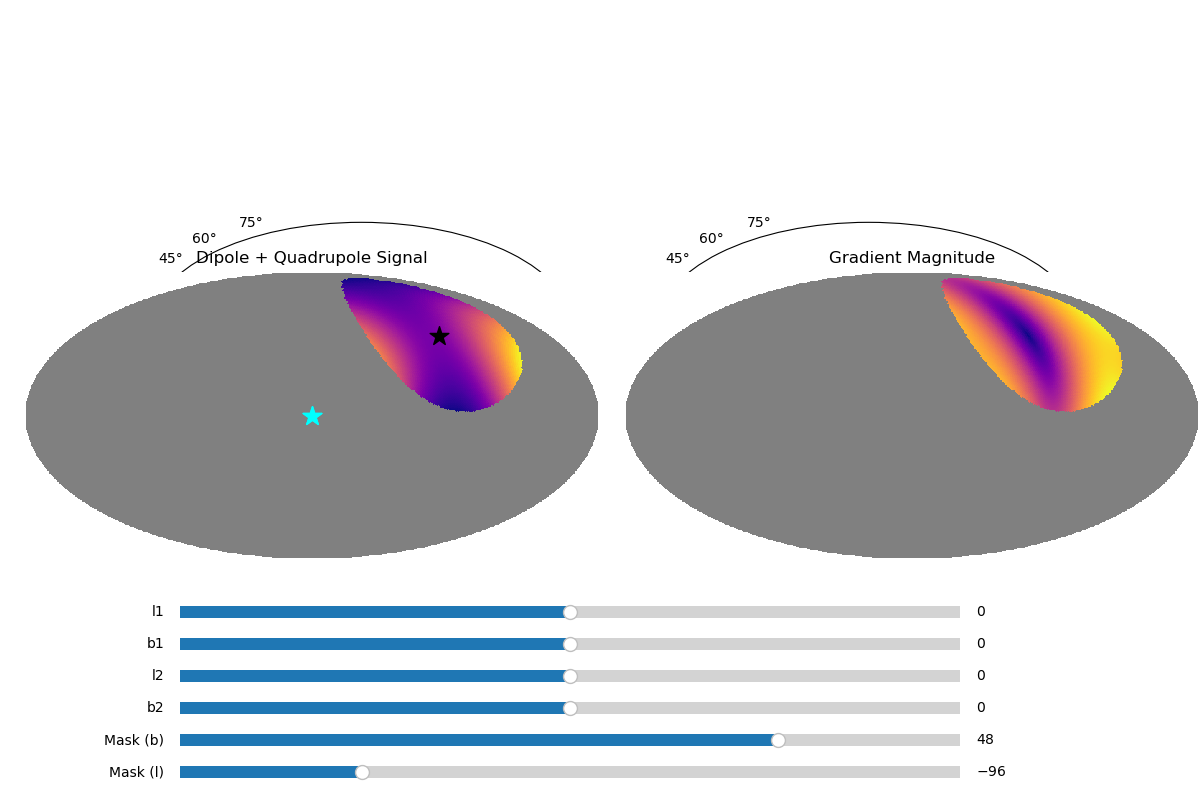

In [79]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib widget

NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
Q = 0.014
D = 0.007

def dipole_quadrupole_signal_and_gradient(NSIDE, D, Q, dipole_vec, vector_1, vector_2):
    NPIX = hp.nside2npix(NSIDE)
    pixels = np.vstack(hp.pix2vec(NSIDE, np.arange(NPIX)))  # (3, NPIX)

    # Dipole term
    dipole_term = np.dot(dipole_vec, pixels)  # shape (NPIX,)
    dipole_signal = D * dipole_term

    # Quadrupole tensor
    a = hp.ang2vec(vector_1[0], vector_1[1])
    b = hp.ang2vec(vector_2[0], vector_2[1])
    Q_prime = np.outer(a, b)
    Q_star = 0.5 * (Q_prime + Q_prime.T)
    Q_hat = Q_star - (np.trace(Q_star) / 3.0) * np.eye(3)

    # Quadrupole term
    quad_term = np.einsum('ij,i...,j...', Q_hat, pixels, pixels)
    quad_signal = Q * quad_term

    # Total signal
    total_signal = 1 + dipole_signal + quad_signal

    # Gradient calculations
    grad_dip_cart = D * dipole_vec[:, None]
    grad_dip_proj = grad_dip_cart - (D * dipole_term) * pixels

    grad_quad_cart = 2 * Q * (Q_hat @ pixels)
    grad_quad_proj = grad_quad_cart - (2 * Q * quad_term) * pixels

    grad_proj = grad_dip_proj + grad_quad_proj
    grad_mag = np.linalg.norm(grad_proj, axis=0)

    return total_signal, grad_mag

def partial_sky_masking(m, theta, phi, r=40): 
    vec = hp.ang2vec(theta, phi)
    ipix_disc = hp.query_disc(nside=NSIDE, vec=vec, radius=np.radians(r))

    mask = np.zeros(NPIX, dtype=bool)
    mask[ipix_disc] = True  # Set the disc pixels to True

    m_plot = hp.ma(m.copy().astype(float))
    m_plot.mask = ~mask

    return m_plot

# Create a single figure with two Mollweide subplots side-by-side
fig, (ax_signal, ax_grad) = plt.subplots(1, 2, figsize=(12, 8), subplot_kw=dict(projection='mollweide'))

# Turn off default axis ticks and labels
ax_signal.set_axis_off()
ax_grad.set_axis_off()

# Adjust figure to make space for sliders
fig.subplots_adjust(bottom=0.3)
axcolor = 'lightgoldenrodyellow'

# Existing quadrupole vector sliders
ax_l1 = fig.add_axes([0.15, 0.22, 0.65, 0.03], facecolor=axcolor)
ax_b1 = fig.add_axes([0.15, 0.18, 0.65, 0.03], facecolor=axcolor)
ax_l2 = fig.add_axes([0.15, 0.14, 0.65, 0.03], facecolor=axcolor)
ax_b2 = fig.add_axes([0.15, 0.10, 0.65, 0.03], facecolor=axcolor)

# New mask center sliders
ax_mask_theta = fig.add_axes([0.15, 0.06, 0.65, 0.03], facecolor=axcolor)
ax_mask_phi = fig.add_axes([0.15, 0.02, 0.65, 0.03], facecolor=axcolor)

# Sliders
s_l1 = Slider(ax_l1, 'l1', -180, 180, valinit=0)
s_b1 = Slider(ax_b1, 'b1', -90, 90, valinit=0)
s_l2 = Slider(ax_l2, 'l2', -180, 180, valinit=0)
s_b2 = Slider(ax_b2, 'b2', -90, 90, valinit=0)

# Mask sliders range in degrees
s_mask_phi = Slider(ax_mask_phi, 'Mask (l)', -180, 180, valinit=-96)   # longitude l from -180 to 180
s_mask_theta = Slider(ax_mask_theta, 'Mask (b)', -90, 90, valinit=48)   # latitude b from -90 to 90

dipole_theta = np.deg2rad(48)
dipole_phi = -np.deg2rad(360-264)
dipole_vec = np.array(hp.ang2vec(dipole_theta, dipole_phi))

def update(val):
    l1 = s_l1.val
    b1 = s_b1.val
    l2 = s_l2.val
    b2 = s_b2.val

    # Convert slider degrees to radians for vectors
    theta1, phi1 = np.deg2rad(90 - b1), np.deg2rad(l1)
    theta2, phi2 = np.deg2rad(90 - b2), np.deg2rad(l2)

    # Mask center from sliders, convert degrees to radians and to colatitude form
    mask_theta = np.deg2rad(s_mask_theta.val)  # 0 to pi
    mask_phi = np.deg2rad(s_mask_phi.val)      # -pi to pi

    m_signal, grad_mag = dipole_quadrupole_signal_and_gradient(
        NSIDE, D, Q, dipole_vec,
        (theta1, phi1), (theta2, phi2)
    )

    # Clear axes before redraw
    ax_signal.cla()
    ax_grad.cla()

    # Apply masking
    m_signal_masked = partial_sky_masking(m_signal, mask_theta, mask_phi, r=40)
    grad_mag_masked = partial_sky_masking(grad_mag, mask_theta, mask_phi, r=40)

    # Plot masked signal on left
    hp.mollview(m_signal_masked, fig=fig.number, cmap='plasma', title='Dipole + Quadrupole Signal',
                hold=False, sub=(1, 2, 1), cbar=False, coord=None)

    # Overlay stars for dipole and quadrupole vectors
    hp.projscatter(dipole_theta, dipole_phi, lonlat=False, marker='*', s=200, color='k')
    hp.projscatter(theta1, phi1, lonlat=False, marker='*', s=200, color='cyan')
    hp.projscatter(theta2, phi2, lonlat=False, marker='*', s=200, color='cyan')

    # Plot masked gradient magnitude on right
    hp.mollview(grad_mag_masked, fig=fig.number, cmap='plasma', title='Gradient Magnitude',
                hold=False, sub=(1, 2, 2), cbar=False, coord=None)

s_l1.on_changed(update)
s_b1.on_changed(update)
s_l2.on_changed(update)
s_b2.on_changed(update)
s_mask_theta.on_changed(update)
s_mask_phi.on_changed(update)

update(None)
plt.show()

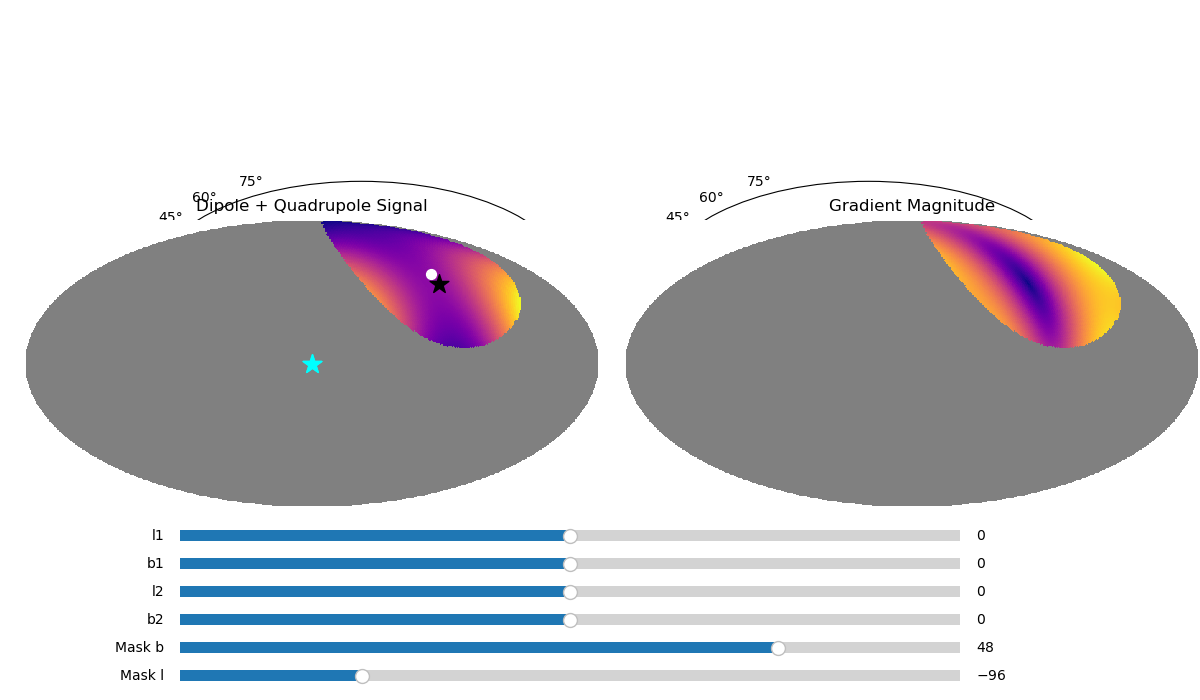

In [86]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib widget

NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
Q = 0.014
D = 0.007

def dipole_quadrupole_signal_and_gradient(NSIDE, D, Q, dipole_vec, vector_1, vector_2):
    NPIX = hp.nside2npix(NSIDE)
    pixels = np.vstack(hp.pix2vec(NSIDE, np.arange(NPIX)))  # (3, NPIX)

    # Dipole term
    dipole_term = np.dot(dipole_vec, pixels)  # shape (NPIX,)
    dipole_signal = D * dipole_term

    # Quadrupole tensor
    a = hp.ang2vec(vector_1[0], vector_1[1])
    b = hp.ang2vec(vector_2[0], vector_2[1])
    Q_prime = np.outer(a, b)
    Q_star = 0.5 * (Q_prime + Q_prime.T)
    Q_hat = Q_star - (np.trace(Q_star) / 3.0) * np.eye(3)

    # Quadrupole term
    quad_term = np.einsum('ij,i...,j...', Q_hat, pixels, pixels)
    quad_signal = Q * quad_term

    # Total signal
    total_signal = 1 + dipole_signal + quad_signal

    # Gradient calculations
    grad_dip_cart = D * dipole_vec[:, None]
    grad_dip_proj = grad_dip_cart - (D * dipole_term) * pixels

    grad_quad_cart = 2 * Q * (Q_hat @ pixels)
    grad_quad_proj = grad_quad_cart - (2 * Q * quad_term) * pixels

    grad_proj = grad_dip_proj + grad_quad_proj
    grad_mag = np.linalg.norm(grad_proj, axis=0)

    return total_signal, grad_mag

def partial_sky_masking(m, theta, phi, r=40): 
    vec = hp.ang2vec(theta, phi)
    ipix_disc = hp.query_disc(nside=NSIDE, vec=vec, radius=np.radians(r))

    mask = np.zeros(NPIX, dtype=bool)
    mask[ipix_disc] = True  # Set the disc pixels to True

    m_plot = hp.ma(m.copy().astype(float))
    m_plot.mask = ~mask

    return m_plot

# Create a single figure with two Mollweide subplots side-by-side
fig, (ax_signal, ax_grad) = plt.subplots(1, 2, figsize=(12, 7), subplot_kw=dict(projection='mollweide'))

# Turn off default axis ticks and labels
ax_signal.set_axis_off()
ax_grad.set_axis_off()

# Adjust figure to make space for sliders
fig.subplots_adjust(bottom=0.3)
axcolor = 'lightgoldenrodyellow'

# Existing quadrupole vector sliders
ax_l1 = fig.add_axes([0.15, 0.22, 0.65, 0.03], facecolor=axcolor)
ax_b1 = fig.add_axes([0.15, 0.18, 0.65, 0.03], facecolor=axcolor)
ax_l2 = fig.add_axes([0.15, 0.14, 0.65, 0.03], facecolor=axcolor)
ax_b2 = fig.add_axes([0.15, 0.10, 0.65, 0.03], facecolor=axcolor)

# New mask center sliders (latitude and longitude)
ax_mask_b = fig.add_axes([0.15, 0.06, 0.65, 0.03], facecolor=axcolor)
ax_mask_l = fig.add_axes([0.15, 0.02, 0.65, 0.03], facecolor=axcolor)

# Sliders
s_l1 = Slider(ax_l1, 'l1', -180, 180, valinit=0)
s_b1 = Slider(ax_b1, 'b1', -90, 90, valinit=0)
s_l2 = Slider(ax_l2, 'l2', -180, 180, valinit=0)
s_b2 = Slider(ax_b2, 'b2', -90, 90, valinit=0)

# Mask sliders latitude (b) and longitude (l)
s_mask_b = Slider(ax_mask_b, 'Mask b', -90, 90, valinit=48)   # latitude range -90 to 90
s_mask_l = Slider(ax_mask_l, 'Mask l', -180, 180, valinit=-96) # longitude range -180 to 180

dipole_theta = np.deg2rad(48)
dipole_phi = -np.deg2rad(360-264)
dipole_vec = np.array(hp.ang2vec(dipole_theta, dipole_phi))

def update(val):
    l1 = s_l1.val
    b1 = s_b1.val
    l2 = s_l2.val
    b2 = s_b2.val

    # Convert slider degrees to radians for quadrupole vectors
    theta1, phi1 = np.deg2rad(90 - b1), np.deg2rad(l1)
    theta2, phi2 = np.deg2rad(90 - b2), np.deg2rad(l2)

    # Convert mask sliders latitude-longitude (b,l) to healpy theta-phi
    mask_theta = np.deg2rad(90 - s_mask_b.val)  # colatitude theta
    mask_phi = np.deg2rad(s_mask_l.val)         # longitude phi

    m_signal, grad_mag = dipole_quadrupole_signal_and_gradient(
        NSIDE, D, Q, dipole_vec,
        (theta1, phi1), (theta2, phi2)
    )

    # Clear axes before redraw
    ax_signal.cla()
    ax_grad.cla()

    # Apply partial sky masking
    m_signal_masked = partial_sky_masking(m_signal, mask_theta, mask_phi, r=40)
    grad_mag_masked = partial_sky_masking(grad_mag, mask_theta, mask_phi, r=40)

    # Plot masked signal on left
    hp.mollview(m_signal_masked, fig=fig.number, cmap='plasma', title='Dipole + Quadrupole Signal',
                hold=False, sub=(1, 2, 1), cbar=False, coord=None)

    # Overlay stars for dipole and quadrupole vectors
    hp.projscatter(dipole_theta, dipole_phi, lonlat=False, marker='*', s=200, color='k')
    hp.projscatter(theta1, phi1, lonlat=False, marker='*', s=200, color='cyan')
    hp.projscatter(theta2, phi2, lonlat=False, marker='*', s=200, color='cyan')
    hp.projscatter(mask_theta, mask_phi, lonlat=False, marker='o', s=50, color='white')

    # Plot masked gradient magnitude on right
    hp.mollview(grad_mag_masked, fig=fig.number, cmap='plasma', title='Gradient Magnitude',
                hold=False, sub=(1, 2, 2), cbar=False, coord=None)

s_l1.on_changed(update)
s_b1.on_changed(update)
s_l2.on_changed(update)
s_b2.on_changed(update)
s_mask_b.on_changed(update)
s_mask_l.on_changed(update)

update(None)
plt.show()

In [103]:
plt.close()